# VISUALIZING THE DATA

In [1]:
#imports necessary
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
#setting our directory path where our data is located

In [3]:
my_data_dir = 'C:\\Users\\Shail\\Desktop\\Malaria-cell-detection\\cell_images'

In [4]:
os.listdir(my_data_dir)

['test', 'train']

In [5]:
test_path = my_data_dir + '\\test'
train_path = my_data_dir + '\\train'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path + '//parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
para_cell = train_path + '//parasitized' + '//C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_img = imread(para_cell)

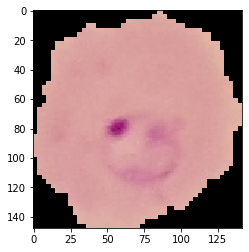

In [11]:
plt.imshow(para_img)

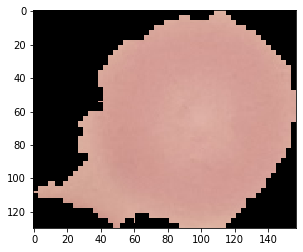

In [12]:
uninfected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[5]
uninfected_cell_img = imread(uninfected_cell_path)
plt.imshow(uninfected_cell_img)

In [13]:
uninfected_cell_img.shape

(130, 157, 3)

In [14]:
para_img.shape

(148, 142, 3)

Attemptimg to find the mean of dimension dim1 and dim2 in dim1,dim2,color 

In [15]:
dim1 = []
dim2 = []
for file_name in os.listdir(test_path+'\\uninfected'):
    img = imread(test_path+'\\uninfected\\'+file_name)
    d1,d2,color  = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [16]:
np.mean(dim1)

130.92538461538462

In [17]:
np.mean(dim2)

130.75

Since the average size of image is around the 130,130,3 we will go ahead and set the default size of image to be 130,130,3(Note that it is essential to have all image be of same size while training the model)

In [18]:
input_size = (130,130,3)

# PREPARING THE DATA FOR THE MODEL

The next thing is to prepare the data for model. Since it is not feasible to pass all data at once it is highly recommended to pass the data in batches while training the model.

IMAGE DATA GENRATOR:-
It is often a good practice to manipulate the image data by rotating, resizing etc in order to make the model more robust. Luckily we have inbuilt Image Data Generator to do it. Kindly read the documentation on IDG before applying as it requires the data to be stored in particular format. 

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [21]:
#working with ImageDataGenerator

In [22]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Image before


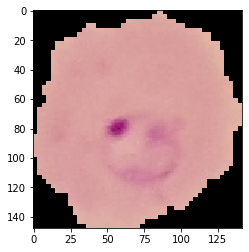

Image after applying image_gen on it FIRST time


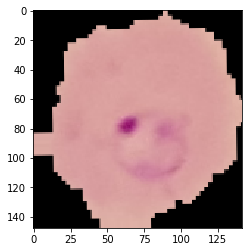

In [23]:
print("Image before")
plt.imshow(para_img)
plt.show()
print("Image after applying image_gen on it FIRST time")
plt.imshow(image_gen.random_transform(para_img))

In [24]:
#our folder train_path is the main image folder with 2 classes in it :- uninfected and parsitized
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [25]:
#our folder test_path is the main image folder with 2 classes in it :- uninfected and parsitized
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [26]:
#the above code needs to be assigned to a variable

# CREATING THE MODEL

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [28]:
#Creating the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_size, activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_size, activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_size, activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Randomly turning off 50% of the neurons to avoid overfitting the data

#Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))


#Compiling the model
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

# APPLYING EARLY STOPPING

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# TRAINING THE MODEL

In [32]:
#Now we will apply the .flow_from_directory

In [33]:
batch_size = 16
#dont make the batch size too large as it will take longer to train

In [34]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=input_size[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [35]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=input_size[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [37]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
results = model.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 1300s 833ms/step - loss: 0.4603 - accuracy: 0.7848 - val_loss: 0.2348 - val_accuracy: 0.9296
Epoch 2/20
1560/1560 [==============================] - 842s 539ms/step - loss: 0.1892 - accuracy: 0.9418 - val_loss: 0.1961 - val_accuracy: 0.9373
Epoch 3/20
1560/1560 [==============================] - 824s 528ms/step - loss: 0.1622 - accuracy: 0.9472 - val_loss: 0.1736 - val_accuracy: 0.9373
Epoch 4/20
1560/1560 [==============================] - 822s 527ms/step - loss: 0.1629 - accuracy: 0.9491 - val_loss: 0.1567 - val_accuracy: 0.9450
Epoch 5/20
1560/1560 [==============================] - 819s 525ms/step - loss: 0.1581 - accuracy: 0.9496 - val_loss: 0.1599 - val_accuracy: 0.9504
Epoch 6/20
1560/1560 [==============================] - 814s 522ms/step - loss: 0.1557 - accuracy: 0.9499 - val_loss: 0.1521 - val_accuracy: 0.9496
Epoch 7/20
1560/1560 [==============================] - 816s 523ms/step - loss: 0.1541 - accuracy: 0.9514 - val

In [41]:
model.save('malaria_cell_detection_model.h5')

In [42]:
losses = pd.DataFrame(model.history.history)

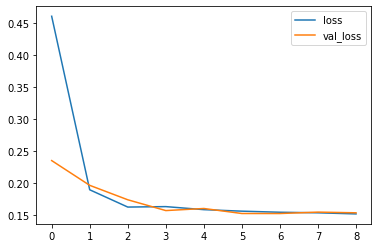

In [45]:
losses[['loss','val_loss']].plot()

In [47]:
model.evaluate_generator(test_image_gen)

[0.1535812903451305, 0.9519231]

In [49]:
from tensorflow.keras.preprocessing import image

In [50]:
predictions = model.predict_generator(test_image_gen)

In [51]:
predictions

array([[1.17242336e-04],
       [1.74015760e-04],
       [1.13415718e-03],
       ...,
       [9.46313202e-01],
       [9.78012919e-01],
       [9.52811360e-01]], dtype=float32)

In [52]:
#here all the values less than 0.5 will be considered to be one class and all the values above 0.5 
# are considered second class

In [53]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
predictions = predictions > 0.5

In [55]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [56]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [57]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.94      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [61]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[1214   86]
 [  45 1255]]


In [62]:
print(accuracy_score(test_image_gen.classes,predictions))

0.9496153846153846


In [63]:
uninfected_image

'C:\\Users\\Shail\\Desktop\\Malaria-cell-detection\\cell_images\\train//parasitized//C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [64]:
my_image = image.load_img(para_cell,target_size=input_size)

In [67]:
type(my_image)

PIL.Image.Image

In [68]:
my_image = image.img_to_array(my_image)

In [70]:
para_img.shape

(148, 142, 3)

In [75]:
my_image.shape

(130, 130, 3)

In [76]:
my_image = np.expand_dims(my_image,axis=0)

In [78]:
my_image.shape

(1, 130, 130, 3)

In [79]:
model.predict(my_image)

array([[0.]], dtype=float32)